In [3]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show, adjust_band
import pandas as pd

In [4]:
site_names = ['Haworth_final_adj_5mpp_surf.tif'] # put the names of the sites here

Haworth_final_adj_5mpp_surf.tif opened


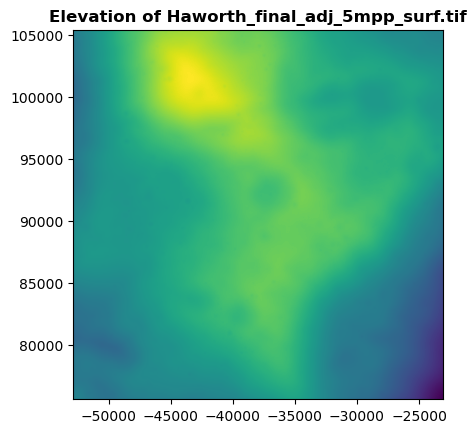

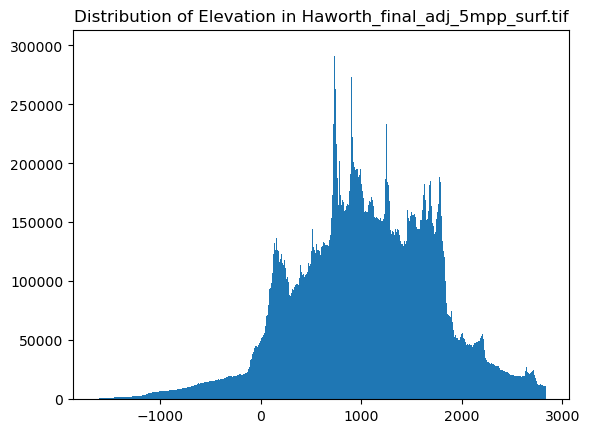

                  0
count  3.552160e+07
mean   1.039324e+03
std    6.871302e+02
min   -1.642901e+03
25%    5.841916e+02
50%    1.032986e+03
75%    1.549237e+03
max    2.842214e+03




In [41]:
import os
GTIFF_SKIP_PACKBITS_DECODE_ERROR = True
from matplotlib.backends.backend_pdf import PdfPages
d_i = np.array([])
for i, site in enumerate(site_names):
    with rasterio.open(site, 'r') as df_i:
        #this is the pdf we're gonna save to

        print(site.strip(), "opened")
        show(df_i, title='Elevation of '+site)
        d_i = np.array(df_i.read(1))
        transform = df_i.transform 

        #plt.plot(d_i)
        #plt.title(f"Slopes in {site.strip()}")
        #plt.show()

        plt.hist(d_i.ravel(), bins=500)
        plt.title(f"Distribution of Elevation in {site}")
        plt.show()

        df_describe = pd.DataFrame(d_i.ravel())
        print(df_describe.describe())

        # make mesh of surface?

        print()
        print()

In [42]:
from rasterio.transform import xy


In [56]:
rows, cols = d_i.shape
x_coords, y_coords = np.meshgrid(
    np.arange(rows), 
    np.arange(cols)
)

# Convert to spatial coordinates
x, y = xy(transform, y_coords, x_coords, offset='center')

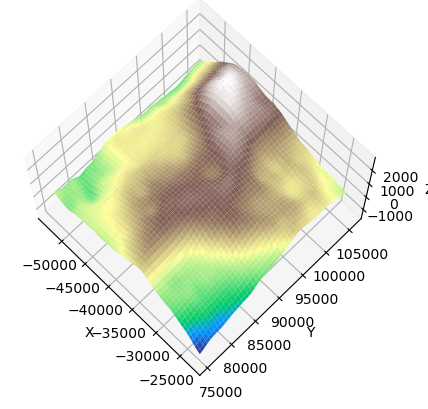

In [58]:
fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.plot_surface(x, y, d_i, cmap='terrain', edgecolor='none')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=70., azim=-45, roll=0)

/home/skelly/.local/lib/python3.12/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
/home/skelly/.local/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(
MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


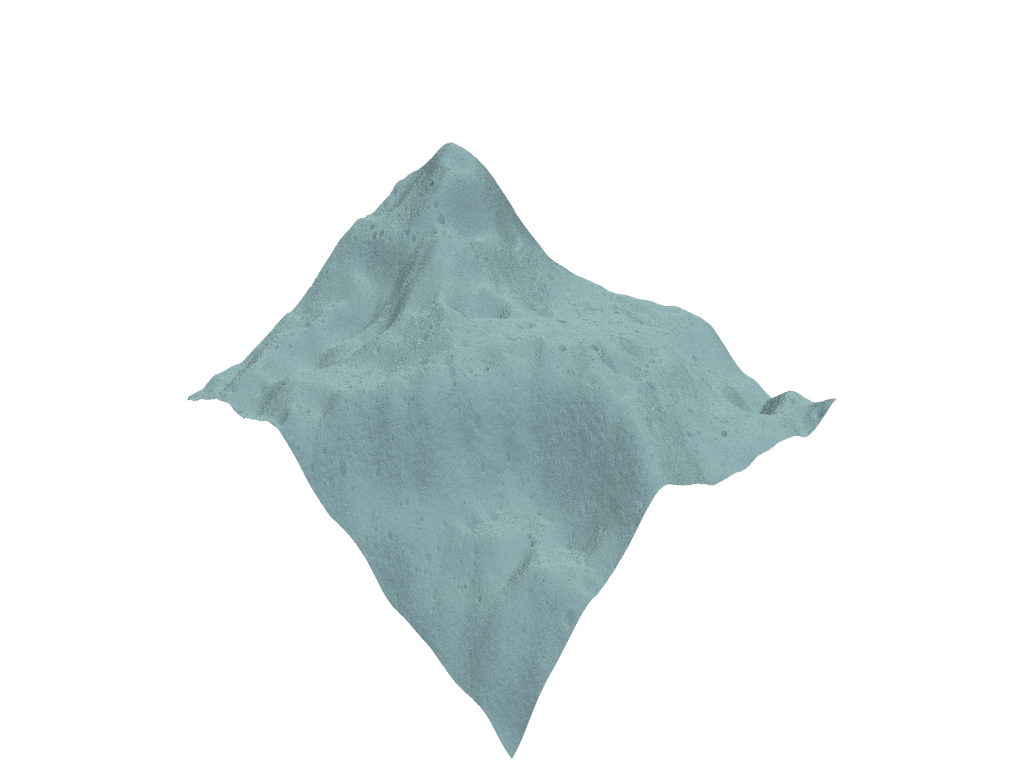

In [65]:
import pyvista as pv

# Create a structured grid
grid = pv.StructuredGrid(x_coords, y_coords, d_i)

# Plot the mesh
plotter = pv.Plotter()
plotter.add_mesh(grid, cmap='terrain')
plotter.show()